# Homework 2 Problem 3


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape

(1460, 81)

In [3]:
test.shape

(1459, 80)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#train.info()

### Transformation on the respones variable SalePrice
Let's check the distribution of the response variable SalePrice
It seems not very normal distributed, what can we do about it??
Please apply the log transformation on the price and plot the distribution of the sale price, is it more normal?

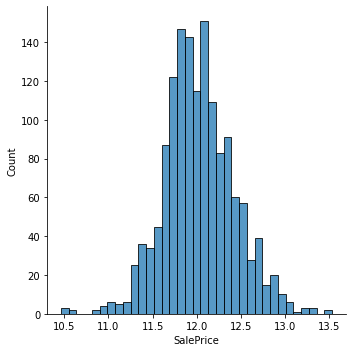

In [39]:
#sns.distplot(train['SalePrice']); = not normal
# Fill in your code for transformation
sns.displot(np.log(train['SalePrice']));

### Preprocessing: Deal with the missing data (NA) and create dummy variable for categorical variables

Please use the mean of the training data to fit in the NA in both training and testing data set. Please also create dummy variables for all the text dataset.

In [6]:
#put your code here
test['SalePrice'] = 0
X = train.append(test)

ddummies = pd.get_dummies(X)
ddummies.fillna(ddummies.mean(), inplace = True)
train_df = ddummies.iloc[0:1459,:]
test_df = ddummies.iloc[1460:2918,:]
Ytrain = np.log(train_df['SalePrice'])
Xtrain = train_df.drop(['Id'], axis = 1)
testx1 = test_df.drop(['Id'], axis=1)
ddummies.head(3)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0


### Model 1: Use Ridge regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


RIDGE: Best CV R2 is 0.9442812824147586, and best alpha is 5


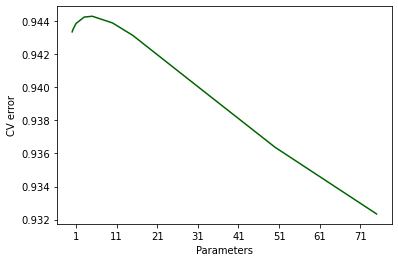

In [7]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale 

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
CV = np.array(alphas)*0


for i, alpha in enumerate(alphas):
    Reg = Ridge(alpha = alpha)
    Reg.fit(scale(Xtrain), Ytrain)
    CV[i] = np.mean(cross_val_score(Reg, scale(Xtrain), Ytrain,cv = 5))
    
plt.plot(alphas, CV, label = r'$\alpha=$',color = "darkgreen")
plt.xticks(range(1,80,10))
plt.gca().set_xlabel('Parameters')
plt.gca().set_ylabel('CV error')


ibst = np.argmax(CV)
best_alpha_ridge = alphas[ibst]
print("RIDGE: Best CV R2 is {}, and best alpha is {}".format(np.max(CV),best_alpha_ridge))  

### Model 2: Use Lasso regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


LASSO: Best CV R2 is 0.9517539345638861, and best alpha is 0.001


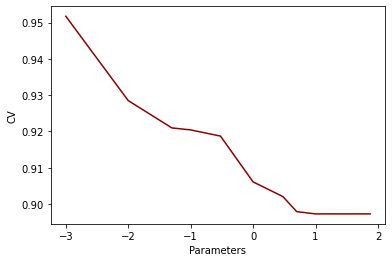

In [8]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

alphas = [0.001, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
CV = np.array(alphas)*0


for i, alpha in enumerate(alphas):
    Lreg = Lasso(alpha = alpha)
    Lreg.fit(scale(Xtrain), Ytrain)
    CV[i] = np.mean(cross_val_score(Lreg, Xtrain, Ytrain,cv = 5))
    
plt.plot(np.log10(alphas), CV, label=r'$\alpha=$',color = "darkred")
plt.gca().set_xlabel('Parameters')
plt.gca().set_ylabel('CV')

ibest = np.argmax(CV)
best_alpha_lasso = alphas[ibest]
print("LASSO: Best CV R2 is {}, and best alpha is {}".format(np.max(CV),best_alpha_lasso))   

### TESTING NET

In [9]:
ridge = Ridge(alpha = best_alpha_ridge,normalize = True)
ridge.fit(Xtrain,Ytrain)
#ridge_coef = ridge.coef_

rpred = ridge.predict(testx1)
print(rpred)


[11.72301814 11.92082771 12.04717631 ... 11.58111167 11.93524037
 11.72527124]


In [10]:
lasso = Lasso(alpha = best_alpha_lasso,normalize = True)
lasso.fit(Xtrain,Ytrain)
#lasso_coef = ridge.coef_

lpred = lasso.predict(testx1)
print(lpred)

[11.31372353 11.34631802 11.35294714 ... 11.28033712 11.33349708
 11.29494502]
